In [1]:
import numpy as np
import pandas as pd
import os 
import time
import deepdish.io as dd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler

from svi import SVI
import models as m
import datasets as d

# Load and Prepare Data

In [2]:
data = dd.load("sequenced_data_for_VAE_lenght-160_stride-10.h5")

In [3]:
X,y = data["X"], data["y"]

In [4]:
X

tensor([[0.1872, 0.1890, 0.1805,  ..., 0.1791, 0.1756, 0.1754],
        [0.1980, 0.1989, 0.1974,  ..., 0.1850, 0.1930, 0.1860],
        [0.2103, 0.2107, 0.2080,  ..., 0.1960, 0.2044, 0.2041],
        ...,
        [0.4694, 0.4644, 0.4707,  ..., 0.4877, 0.4774, 0.4771],
        [0.5260, 0.5163, 0.5141,  ..., 0.4935, 0.5005, 0.5110],
        [0.5704, 0.5643, 0.5629,  ..., 0.5024, 0.4991, 0.5269]],
       dtype=torch.float64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=666)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
train = d.H_alphaSequences(X_train, y_train)
test = d.H_alphaSequences(X_test, y_test)

In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=100, shuffle=True)

# Model setup

In [9]:
torch.cuda.is_available()

True

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [11]:
mod = torch.load("VAE_saves_and_logs/DeepDenseVAE_mark_IV_[160-300-200-100-15]_VDO_GNLL_150ep_lr-1e-4.pt")

In [13]:
opt = torch.load("VAE_saves_and_logs/DeepDenseVAE_mark_IV_[160-300-200-100-15]__VDO_GNLL_150ep_lr-1e-4_optimizer.pt")

In [15]:
#deepmodel = m.DeepDenseVAE_mark_IV(original_dim=160, latent_dim=15, encoder_dims=[300, 200, 100])
svi = SVI(
        vae_model=mod,#deepmodel,
        optimizer=opt,#torch.optim.Adam(deepmodel.parameters(), lr=1e-4),
        loss_function="GaussianNLL",
        verbose=True
        )

cuda:0


In [24]:
loss_hist = svi(epochs=150, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/150], average_loss:125.9158, validation_loss:93.2365
Epoch [2/150], average_loss:71.7798, validation_loss:58.9665
Epoch [3/150], average_loss:40.6663, validation_loss:13.5891
Epoch [4/150], average_loss:-2.4082, validation_loss:-17.8866
Epoch [5/150], average_loss:-27.2609, validation_loss:-38.4190
Epoch [6/150], average_loss:-38.2554, validation_loss:-48.5505
Epoch [7/150], average_loss:-55.2766, validation_loss:-59.5655
Epoch [8/150], average_loss:-65.6194, validation_loss:-70.6262
Epoch [9/150], average_loss:-74.1791, validation_loss:-78.0143
Epoch [10/150], average_loss:-80.4121, validation_loss:-84.8530
Epoch [11/150], average_loss:-87.8738, validation_loss:-88.3878
Epoch [12/150], average_loss:-93.3846, validation_loss:-93.9637
Epoch [13/150], average_loss:-98.3733, validation_loss:-98.2570
Epoch [14/150], average_loss:-101.6793, validation_loss:-100.4050
Epoch [15/150], average_loss:-106.0044, validation_loss:-106.3360
Epoch [16/150], average_loss:-108.1089, validation_

Epoch [126/150], average_loss:-191.7969, validation_loss:-186.2125
Epoch [127/150], average_loss:-191.9498, validation_loss:-186.8851
Epoch [128/150], average_loss:-191.3172, validation_loss:-188.0328
Epoch [129/150], average_loss:-192.5979, validation_loss:-187.6790
Epoch [130/150], average_loss:-192.5492, validation_loss:-185.7732
Epoch [131/150], average_loss:-191.8302, validation_loss:-183.6889
Epoch [132/150], average_loss:-192.1107, validation_loss:-188.2610
Epoch [133/150], average_loss:-192.5464, validation_loss:-187.0517
Epoch [134/150], average_loss:-193.4428, validation_loss:-188.1728
Epoch [135/150], average_loss:-193.4897, validation_loss:-187.0053
Epoch [136/150], average_loss:-192.8622, validation_loss:-188.2425
Epoch [137/150], average_loss:-193.4118, validation_loss:-187.8603
Epoch [138/150], average_loss:-193.5399, validation_loss:-189.3214
Epoch [139/150], average_loss:-193.6318, validation_loss:-186.8287
Epoch [140/150], average_loss:-193.6584, validation_loss:-189.

In [16]:
loss_hist = svi(epochs=150, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/150], average_loss:-195.2328, validation_loss:-189.4370
Epoch [2/150], average_loss:-195.2602, validation_loss:-189.4725
Epoch [3/150], average_loss:-195.2326, validation_loss:-189.1889
Epoch [4/150], average_loss:-195.2470, validation_loss:-189.4654
Epoch [5/150], average_loss:-195.2330, validation_loss:-189.5453
Epoch [6/150], average_loss:-195.2431, validation_loss:-189.3214
Epoch [7/150], average_loss:-195.2168, validation_loss:-189.3973
Epoch [8/150], average_loss:-195.2504, validation_loss:-189.3758
Epoch [9/150], average_loss:-195.1749, validation_loss:-189.4628
Epoch [10/150], average_loss:-195.2097, validation_loss:-189.3886
Epoch [11/150], average_loss:-195.1973, validation_loss:-189.5248
Epoch [12/150], average_loss:-195.2260, validation_loss:-189.4851
Epoch [13/150], average_loss:-195.2372, validation_loss:-189.2471
Epoch [14/150], average_loss:-195.1530, validation_loss:-189.4060
Epoch [15/150], average_loss:-195.2536, validation_loss:-189.2820
Epoch [16/150], ave

KeyboardInterrupt: 

In [16]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:-194.8832, validation_loss:-189.1289
Epoch [2/50], average_loss:-194.1358, validation_loss:-187.5948
Epoch [3/50], average_loss:-193.1945, validation_loss:-189.7684
Epoch [4/50], average_loss:-195.2056, validation_loss:-185.9268
Epoch [5/50], average_loss:-194.9791, validation_loss:-188.5740
Epoch [6/50], average_loss:-194.6244, validation_loss:-184.4563
Epoch [7/50], average_loss:-195.0784, validation_loss:-190.4760
Epoch [8/50], average_loss:-195.5860, validation_loss:-189.5665
Epoch [9/50], average_loss:-195.3169, validation_loss:-188.0777
Epoch [10/50], average_loss:-194.9659, validation_loss:-189.1748
Epoch [11/50], average_loss:-195.6172, validation_loss:-189.5861
Epoch [12/50], average_loss:-195.0912, validation_loss:-188.6808
Epoch [13/50], average_loss:-195.2551, validation_loss:-186.7111
Epoch [14/50], average_loss:-196.2408, validation_loss:-190.0160
Epoch [15/50], average_loss:-195.6977, validation_loss:-189.3564
Epoch [16/50], average_loss:-196.1

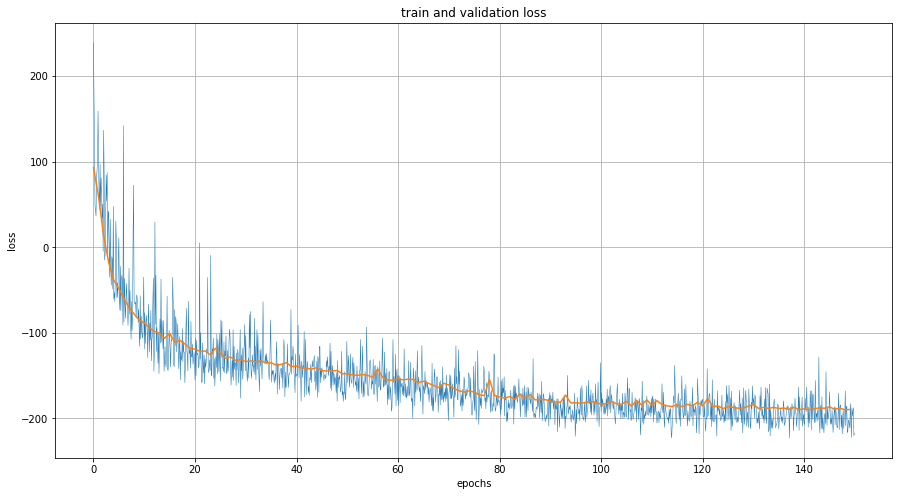

In [25]:
plt.figure(figsize=(15,8))
plt.title("train and validation loss")
epoch_axis = np.arange(len(svi.loss_history["train"]))
plt.plot(epoch_axis/10, np.array(svi.loss_history["train"]), lw=0.5) #np.arange(len(svi.loss_history["validation"]))*10
plt.plot(np.arange(len(svi.loss_history["validation"])), svi.loss_history["validation"])
plt.grid(True)
plt.xlabel("epochs") # 1 epoch = 10 points on x axis
plt.ylabel("loss")
plt.show()

In [28]:
#torch.save(svi.model, "VAE_saves_and_logs/DeepDenseVAE_mark_IV_[160-300-200-100-15]_VDO_GNLL_150ep_lr-1e-4.pt")
#torch.save(svi.optimizer, "VAE_saves_and_logs/DeepDenseVAE_mark_IV_[160-300-200-100-15]__VDO_GNLL_150ep_lr-1e-4_optimizer.pt")
#dd.save("VAE_saves_and_logs/DeepDenseVAE_mark_IV_[160-300-200-100-15]_VDO_GNLL_150ep_lr-1e-4_loss_history.h5", svi.loss_history)

# Evaluation

cuda:0


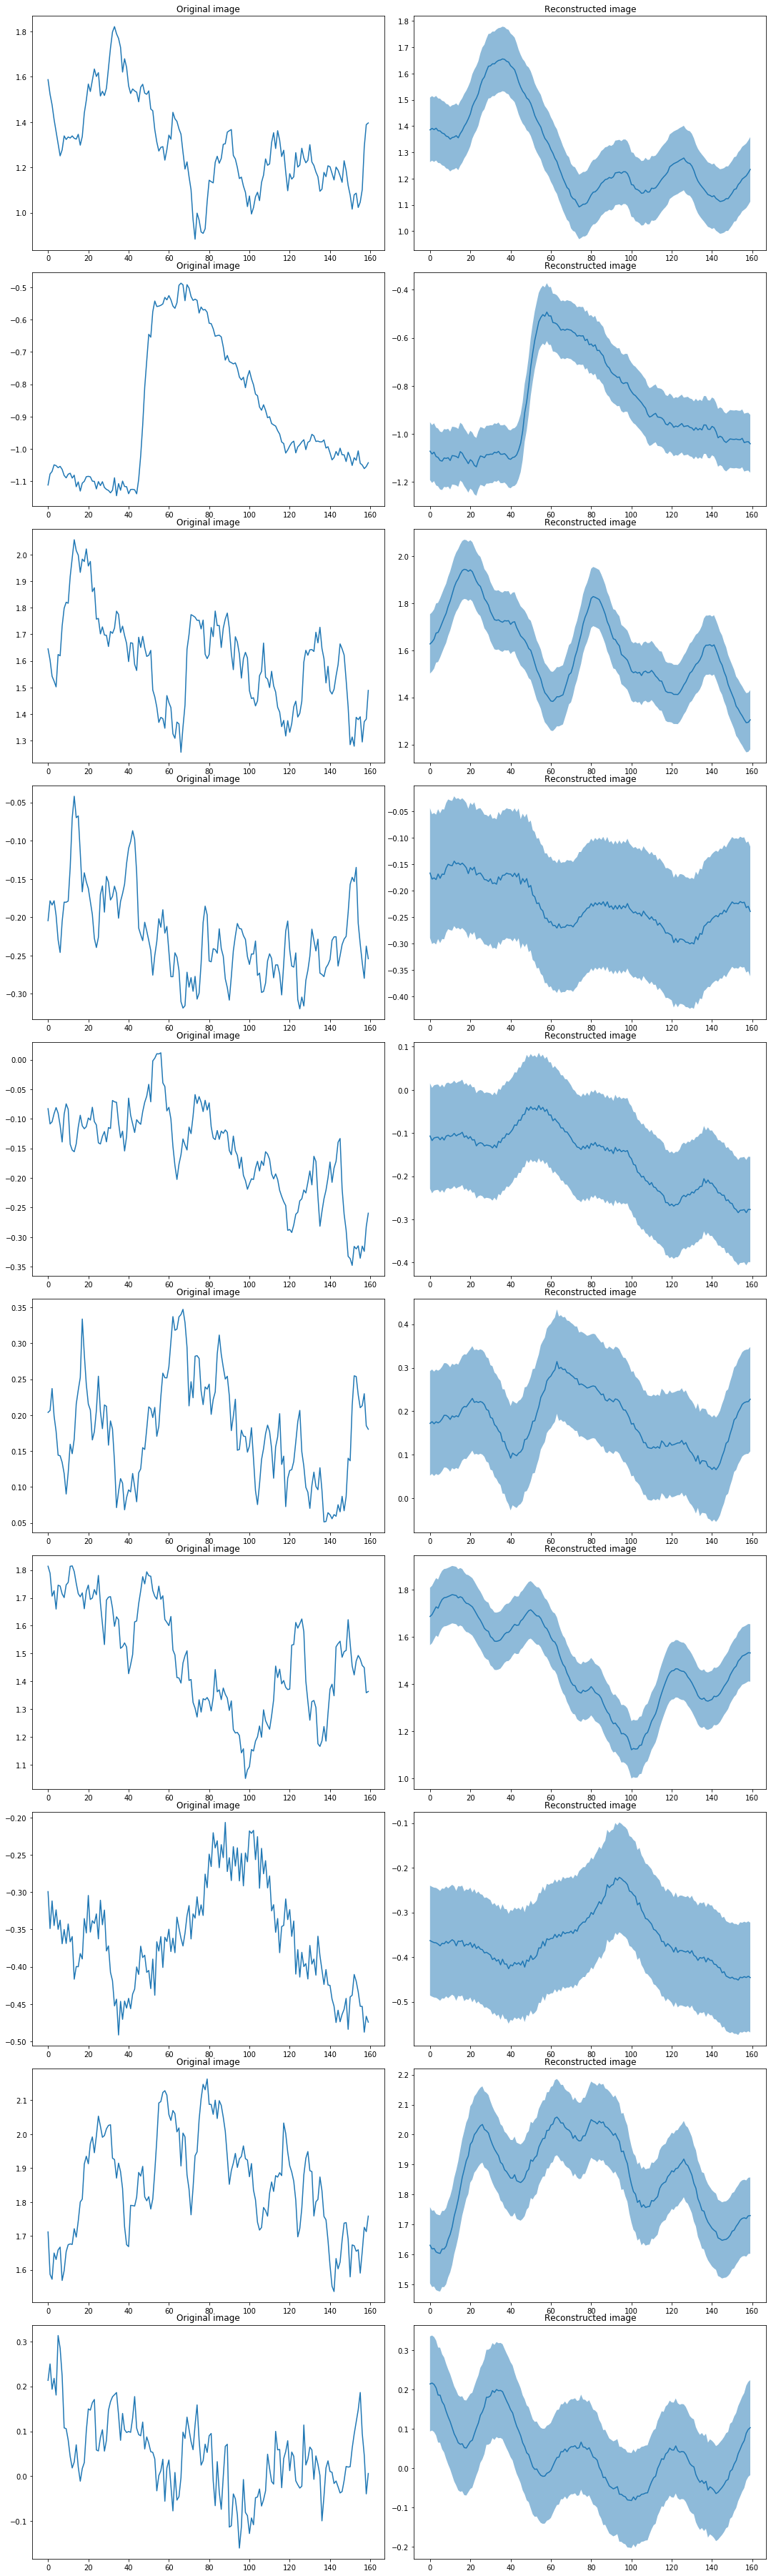

In [29]:
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

# Load Model

In [30]:
mod = torch.load("VAE_saves_and_logs/DeepDenseVAE_mark_IV_[160-300-200-100-15]_VDO_GNLL_150ep_lr-1e-4.pt")

In [31]:
mod.eval()

DeepDenseVAE_mark_IV(
  (encoder): Sequential(
    (0): Flatten()
    (1): Linear(in_features=160, out_features=300, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=300, out_features=200, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Linear(in_features=200, out_features=100, bias=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): VariationalLayer(
      (mu): Linear(in_features=100, out_features=15, bias=True)
      (rho): Linear(in_features=100, out_features=15, bias=True)
      (softplus): Softplus(beta=1, threshold=20)
    )
  )
  (decoder): Sequential(
    (0): Linear(in_features=15, out_features=100, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=100, out_features=200, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=200, out_features=300, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): VariationalDecoderOutput(
      (mu): Linear(in_features=300, out_features

In [32]:
z, mu, sigma = mod.encoder(X.to(device))

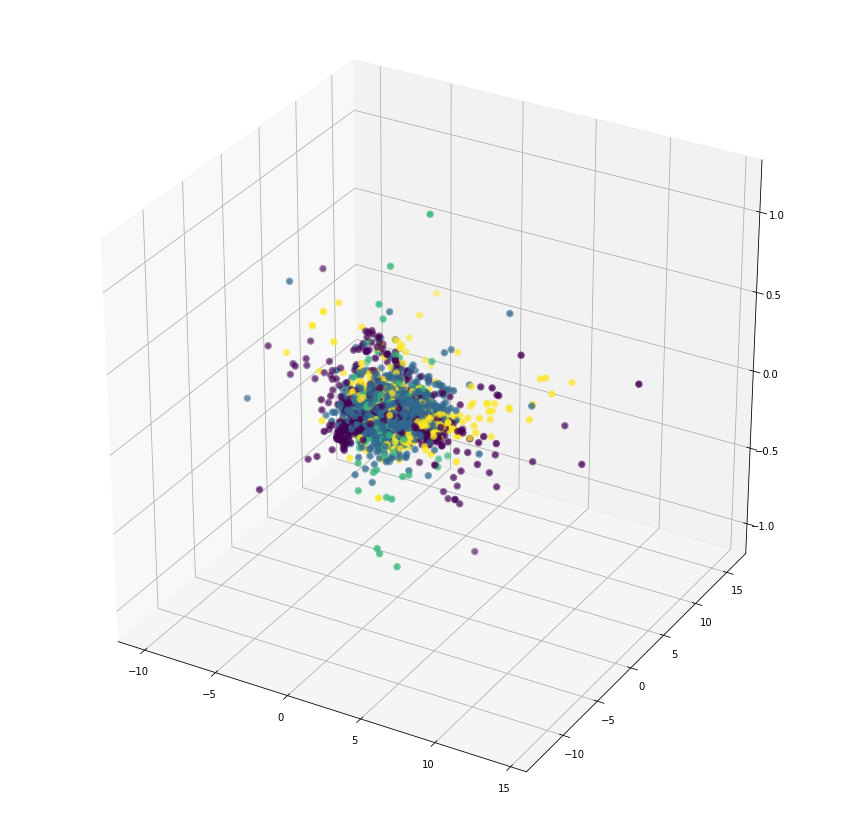

In [33]:
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

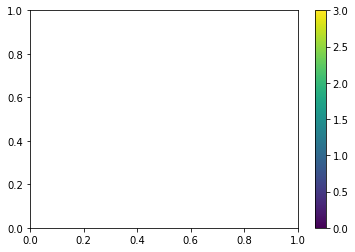

In [26]:
# když přidám colorbar k obrázku tak se nehezky deformuje, tak je tady zvlášť
plt.colorbar(sc, shrink=1)

In [45]:
test.y

tensor([1., 1., 1.,  ..., 3., 1., 0.])